## Load a dataset and run a UMAP reduction

In [1]:
import pathlib
from umap_manager import UMAPManager

# case = 'tiny_case'
# case = 'TCGA-3C-AALI-01Z-00-DX1'
case = 'TCGA-3C-AALK-01Z-00-DX1'
DATA_DIR = pathlib.Path(f'../TCGA/downloads/{case}')

# instantiate manager
manager = UMAPManager(DATA_DIR)

Reading HIPS data.
Found 412219 features.


View the data that was read by the manager

In [2]:
manager.sample_size = 500
manager.data.head(5)

Computing density column.


,Identifier.Xmin,Identifier.Ymin,Identifier.Xmax,Identifier.Ymax,Identifier.CentroidX,Identifier.CentroidY,ClassifProbab.CancerEpithelium,ClassifProbab.StromalCellNOS,ClassifProbab.ActiveStromalCellNOS,ClassifProbab.TILsCell,...,Cytoplasm.Haralick.Entropy.Range,Cytoplasm.Haralick.DifferenceVariance.Mean,Cytoplasm.Haralick.DifferenceVariance.Range,Cytoplasm.Haralick.DifferenceEntropy.Mean,Cytoplasm.Haralick.DifferenceEntropy.Range,Cytoplasm.Haralick.IMC1.Mean,Cytoplasm.Haralick.IMC1.Range,Cytoplasm.Haralick.IMC2.Mean,Cytoplasm.Haralick.IMC2.Range,density
713,335.0,597.0,343.0,607.0,338.0,602.0,0.773297,0.007327,0.013518,0.000391,...,0.497412,0.009421,0.003331,1.856467,0.502597,-0.263590,0.161006,0.888628,0.101495,0.003543
981,386.0,410.0,395.0,417.0,390.0,413.0,0.015657,0.865385,0.003170,0.002074,...,0.733899,0.007161,0.005002,2.241249,0.872592,-0.354742,0.176050,0.967671,0.034358,0.001893
838,901.0,949.0,909.0,957.0,905.0,953.0,0.054619,0.405653,0.049039,0.253822,...,0.575100,0.009454,0.004095,1.854023,0.582125,-0.471649,0.149785,0.987246,0.014120,0.002044
802,548.0,639.0,556.0,644.0,552.0,641.0,0.212525,0.019914,0.329016,0.000642,...,0.332839,0.007429,0.002038,2.274621,0.326723,-0.260363,0.098253,0.905805,0.061089,0.196419
240,707.0,456.0,730.0,464.0,718.0,460.0,0.016446,0.897159,0.001496,0.000361,...,0.782516,0.011909,0.004441,1.478382,0.591762,-0.416880,0.229004,0.962865,0.044944,0.080353


View the image that was read by the manager

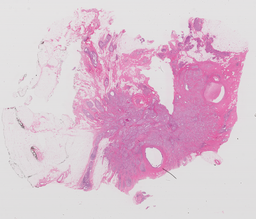

In [3]:
manager.image

Show thumbnails of the first fifty cells in the data

In [4]:
manager.show_cell_thumbnails(range(50))

GridBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00"\x00\x00\x00"\x08\x02\x00\x00\…

GridBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00"\x00\x00\x00"\x08\x02\x00\x00\…

Reduce dims for 500 random cells and plot the result. Try using the lasso-select tool to view thumbnails of selected cells.

In [5]:
manager.reduce_dims(plot=True)
manager.reduce_dims(plot=False).shape

Training UMAP Transform.
Completed training in 8.240853 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.001275 seconds.


FigureWidget({
    'data': [{'marker': {'color': {'bdata': ('AAABAAIAAwAEAAUABgAHAAgACQAKAA' ... 'HqAesB7AHtAe4B7wHwAfEB8gHzAQ=='),
                                   'dtype': 'i2'}},
              'mode': 'markers',
              'type': 'scatter',
              'uid': 'fe03ee4d-bba8-4b6e-88ec-397701be712d',
              'x': {'bdata': ('NNmzPi7llED1jHJAVHkUQM+q7EBKYD' ... 'lBizA0vy1FK8CTmkNB6FeZQHkRP0E='),
                    'dtype': 'f4'},
              'y': {'bdata': ('hm0TQCIPwz+VzVe/z3xHP0riBz9YiS' ... 'g/4kU4QBRnoUDQYxpAzOWJP9fWSEA='),
                    'dtype': 'f4'}}],
    'layout': {'template': '...'}
})

VBox()

Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.001126 seconds.


(500, 2)

## Compare UMAP results in an animation

Compare results for different values for the ``random_state`` argument

In [15]:
reductions = {}
for i in range(0, 20):
    reductions[f'random state {i}'] = dict(
        random_state=i, 
        init='random',
        n_jobs=1,
    )
manager.compare_reductions(**reductions)

Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.001013 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000974 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.001141 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.001066 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000879 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000841 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000739 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000882 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000687 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000699

Compare results for different values for the ``n_neighbors`` argument

In [14]:
# prior to running another comparison, reset manager to defaults
manager.reset()

reductions = {}
for i in range(3, 30):
    reductions[f'{i} neighbors'] = dict(
        n_neighbors=i,
        # ensure that compared reductions start from the same random state
        random_state=0, 
        n_jobs=1,
    )
manager.compare_reductions(**reductions)

Training UMAP Transform.
Completed training in 0.667428 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.001137 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000721 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000916 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000815 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000767 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000755 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000754 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.00072 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000879 seconds.
Running inference on 500 ce

Exclude columns from the data

In [11]:
column_patterns = ['slide', 'roiname', 'Identifier.', 'ClassifProbab.', 'Cytoplasm.', 'Nucleus.']
manager.exclude_columns = [
    c for c in manager.columns
    if any(p in c for p in column_patterns)
]
manager.data.head(5)

,Orientation.Orientation,Size.Area,Size.ConvexHullArea,Size.MajorAxisLength,Size.MinorAxisLength,Size.Perimeter,Shape.Circularity,Shape.Eccentricity,Shape.EquivalentDiameter,Shape.Extent,...,Shape.WeightedHuMoments5,Shape.WeightedHuMoments6,Shape.WeightedHuMoments7,Shape.FSD1,Shape.FSD2,Shape.FSD3,Shape.FSD4,Shape.FSD5,Shape.FSD6,density
713,0.478489,86.0,88.0,12.494227,8.879231,33.071068,0.988125,0.703529,10.464158,0.868687,...,1.107565e-24,1.370674e-16,-1.284443e-25,0.476573,0.003441,0.002777,0.207177,0.031787,0.021962,0.003543
981,1.272146,68.0,72.0,11.152618,7.850225,29.071068,1.011106,0.710308,9.304853,0.850000,...,-2.537944e-23,-1.241087e-15,3.736413e-23,0.480720,0.003897,0.169036,0.124727,0.028719,0.017857,0.001893
838,-0.878354,74.0,75.0,10.118835,9.365985,29.071068,1.100322,0.378505,9.706685,0.913580,...,-1.240664e-22,-1.201140e-15,-7.701913e-23,0.488873,0.001623,0.007743,0.209030,0.025610,0.017766,0.002044
802,-1.527077,51.0,52.0,10.006601,6.563109,24.828427,1.039637,0.754867,8.058239,0.944444,...,1.060282e-20,6.488486e-14,3.140625e-20,0.470940,0.009280,0.210435,0.015014,0.030360,0.011037,0.196419
240,-1.493003,195.0,201.0,26.481735,9.533471,58.485281,0.716393,0.932952,15.756958,0.902778,...,5.464368e-21,8.286507e-14,-1.778594e-23,0.501147,0.002175,0.013548,0.198070,0.025145,0.018335,0.080353


Compare results when excluding different sets of columns

In [12]:
# prior to running another comparison, reset manager to defaults
manager.reset()

reductions = {}
for i in range(0, 20):
    exclude_columns = [
        c for c in manager.columns
        if any(p in c for p in column_patterns[:i])
    ]
    reductions[f'exclude {len(exclude_columns)} columns'] = dict(
        exclude_columns=exclude_columns,
        # ensure that compared reductions start from the same random state
        random_state=0, 
        n_jobs=1,
    )
manager.compare_reductions(**reductions)

Training UMAP Transform.
Completed training in 1.011346 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.001217 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000867 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000742 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 3.895386 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 1.003898 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.987853 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 1.167189 seconds.


Compare results for different values for the ``metric`` argument

In [13]:
# prior to running another comparison, reset manager to defaults
manager.reset()

metrics = [
    'euclidean', 'manhattan', 'chebyshev', 
    'minkowski', 'canberra', 'braycurtis', 
    'mahalanobis', 'wminkowski', 'cosine', 'correlation'
]
reductions = {}
for metric in metrics:
    reductions[metric] = dict(
        metric=metric,
        # ensure that compared reductions start from the same random state
        random_state=0, 
        n_jobs=1,
    )
manager.compare_reductions(**reductions)

Training UMAP Transform.
Completed training in 1.154219 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.001603 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000841 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.00066 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.00086 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000837 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000778 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000835 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000696 seconds.
Running inference on 500 cells with trained UMAP Transform.
Completed inference in 0.000658 seconds.
Running inference on 500 cel